**Custom Training**

In [1]:
!nvidia-smi


Wed Jan 22 10:38:00 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [3]:
# Pip install method

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.8/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/dataset

/content/drive/.shortcut-targets-by-id/1vLbYzms7VJvzgn2SWLDd2_vQQ1B1GU3y/dataset


In [7]:
import os

dataset_path = '/content/drive/MyDrive/dataset'

In [8]:
print("Dataset Structure:")
!ls -l {dataset_path}/train
!ls -l {dataset_path}/valid
!ls -l {dataset_path}/test | head -5

Dataset Structure:
total 352
drwx------ 2 root root   4096 Jan 21 15:00 images
drwx------ 2 root root   4096 Jan 21 15:00 labels
-rw------- 1 root root 351237 Jan 21 18:43 labels.cache
total 178
drwx------ 2 root root  4096 Jan 21 15:00  images
drwx------ 2 root root  4096 Jan 21 15:00  labels
-rw------- 1 root root 86799 Jan 21 18:45 'labels (1).cache'
-rw------- 1 root root 86799 Jan 21 19:35  labels.cache
total 204
-rw------- 1 root root  16550 Dec 28  2023 1.png
-rw------- 1 root root 124275 Dec 28  2023 2.png
-rw------- 1 root root  38794 Dec 28  2023 3.png
-rw------- 1 root root  27798 Dec 28  2023 4.jpg


In [9]:
yaml_content = f'''
path: {dataset_path}
train: train/images
val: valid/images
test: test

nc: 9
names: ['upper arrow', 'down arrow', 'left arrow', 'right arrow', 'decision', 'terminal', 'print', 'input_output', 'process']
'''

In [10]:
yaml_path = f'{dataset_path}/data.yaml'
with open(yaml_path, 'w') as f:
    f.write(yaml_content.strip())

print("\nYAML Configuration:")
!cat {yaml_path}


YAML Configuration:
path: /content/drive/MyDrive/dataset
train: train/images
val: valid/images
test: test

nc: 9
names: ['upper arrow', 'down arrow', 'left arrow', 'right arrow', 'decision', 'terminal', 'print', 'input_output', 'process']

**validate custom model**

In [1]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.6/286.6 kB 24.2 MB/s eta 0:00:00


## New method

Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1vLbYzms7VJvzgn2SWLDd2_vQQ1B1GU3y/dataset/valid/labels.cache... 153 images, 0 backgrounds, 1 corrupt: 100% 153/153 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1vLbYzms7VJvzgn2SWLDd2_vQQ1B1GU3y/dataset/valid/images/174_jpg.rf.4ae361e36c8c2337ab557d07a0e1229f.jpg: ignoring corrupt image/label: could not convert string to float: 'w'
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:13<00:00,  1.33s/it]
                   all        152       1981      0.985      0.982      0.991      0.723
           upper arrow         24        205      0.995      0.995      0.995      0.441
            down arrow         25        210      0.996          1      0.995      0.595
            left arrow         

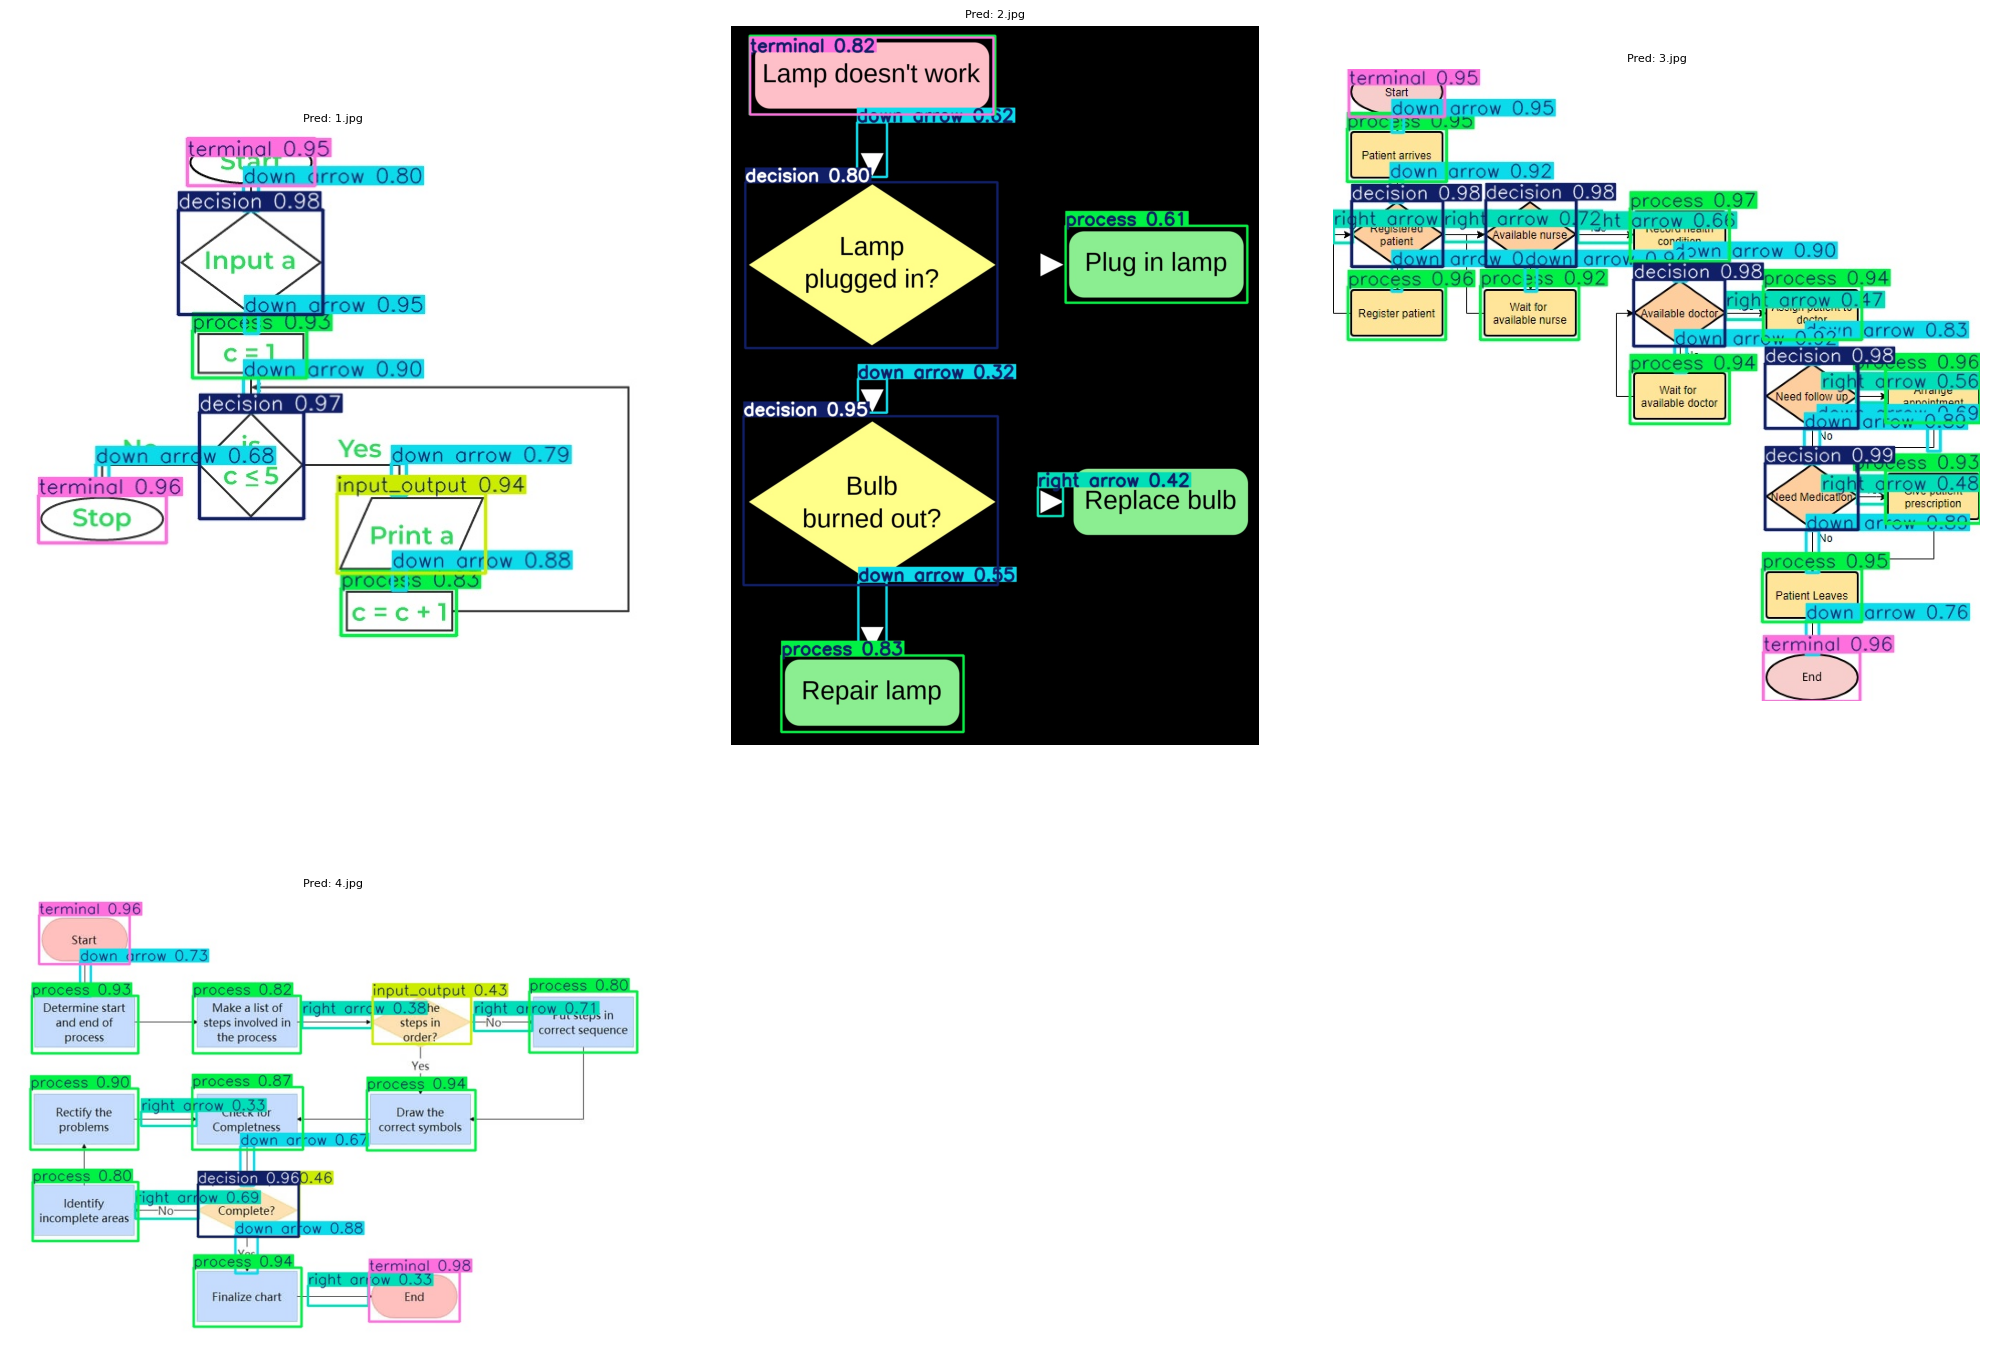

In [2]:
# --------------------------
# 7. Enhanced Inference & Visualization
# --------------------------
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import easyocr
import numpy as np
from ultralytics import YOLO

# Validate model
dataset_path = '/content/drive/MyDrive/dataset'
yaml_path = f'{dataset_path}/data.yaml'
!yolo task=detect mode=val model={dataset_path}/runs/detect/train/weights/best.pt data={yaml_path}

# Predict and visualize
!yolo task=detect mode=predict model={dataset_path}/runs/detect/train/weights/best.pt conf=0.3 source={dataset_path}/test save=True

def visualize_predictions():
    results_path = f'{dataset_path}/runs/detect/predict'
    images = [f for f in os.listdir(results_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    plt.figure(figsize=(20, 15))
    for idx, img_name in enumerate(images[:6]):
        img_path = os.path.join(results_path, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(2, 3, idx+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Pred: {img_name}", fontsize=8)
    plt.tight_layout()
    plt.show()

visualize_predictions()

Detected Shapes:
ID 1: terminal | Center: (239.9, 33.2) | Text: Start
ID 2: decision | Center: (239.8, 132.5) | Text: Input a
ID 3: process | Center: (238.7, 224.0) | Text: C =1
ID 4: decision | Center: (240.4, 334.6) | Text: C <5
ID 5: input_output | Center: (399.6, 402.2) | Text: Print a
ID 6: process | Center: (387.3, 480.2) | Text: c =C +1
ID 7: terminal | Center: (91.9, 388.3) | Text: Stop

Generated Edges:
Source: 1 (Start) → Target: 2 (Input a)
Source: 2 (Input a) → Target: 3 (C =1)
Source: 3 (C =1) → Target: 4 (C <5)
Source: 4 (C <5) → Target: 5 (Print a)
Source: 4 (C <5) → Target: 7 (Stop)
Source: 5 (Print a) → Target: 6 (c =C +1)
Source: 6 (c =C +1) → Target: 4 (C <5)

In [3]:
# --------------------------
# 8.1 Inspect Raw Detections for First Image
# --------------------------
test_image_path = f'{dataset_path}/test/1.png'

# Load model and get detections
model = YOLO(f'{dataset_path}/runs/detect/train/weights/best.pt')
detections = model.predict(test_image_path, conf=0.3)[0]

print("=== RAW DETECTION INSIGHTS ===")
print(f"Detected {len(detections.boxes)} elements in image:")
for i, box in enumerate(detections.boxes):
    coords = box.xyxy[0].cpu().numpy()
    class_name = model.names[int(box.cls)]
    conf = box.conf.item()
    print(f"Element {i+1}:")
    print(f"  Class: {class_name} ({conf:.2f} confidence)")
    print(f"  Coordinates: {coords}")
    print(f"  Center: ({np.mean(coords[0::2]):.1f}, {np.mean(coords[1::2]):.1f})")
    print("-"*50)


image 1/1 /content/drive/MyDrive/dataset/test/1.png: 512x640 6 down arrows, 2 decisions, 2 terminals, 1 input_output, 2 processs, 54.3ms
Speed: 7.7ms preprocess, 54.3ms inference, 930.6ms postprocess per image at shape (1, 3, 512, 640)
=== RAW DETECTION INSIGHTS ===
Detected 13 elements in image:
Element 1:
  Class: decision (0.98 confidence)
  Coordinates: [     167.86       80.44      311.82      184.47]
  Center: (239.8, 132.5)
--------------------------------------------------
Element 2:
  Class: decision (0.97 confidence)
  Coordinates: [     188.08      281.48      292.82      387.65]
  Center: (240.4, 334.6)
--------------------------------------------------
Element 3:
  Class: terminal (0.96 confidence)
  Coordinates: [     28.065      364.96      155.73      411.72]
  Center: (91.9, 388.3)
--------------------------------------------------
Element 4:
  Class: terminal (0.95 confidence)
  Coordinates: [     176.39      9.5287      303.37      56.813]
  Center: (239.9, 33.2)
--

In [4]:
# --------------------------
# 8.2 Separate Shapes and Arrows
# --------------------------
shape_classes = ['terminal', 'decision', 'process', 'input_output', 'print']
arrow_classes = ['down arrow', 'up arrow', 'left arrow', 'right arrow']

shapes = []
arrows = []

for box in detections.boxes:
    class_name = model.names[int(box.cls)]
    element = {
        'type': class_name,
        'coords': box.xyxy[0].cpu().numpy(),
        'center': (np.mean(box.xyxy[0].cpu().numpy()[0::2]),
                  np.mean(box.xyxy[0].cpu().numpy()[1::2])),
        'text': None
    }

    if class_name in shape_classes:
        shapes.append(element)
    elif class_name in arrow_classes:
        arrows.append(element)

print("=== SHAPE/ARROW SEPARATION ===")
print(f"Found {len(shapes)} shapes:")
for shape in shapes:
    print(f"  {shape['type']} at {shape['center']}")

print(f"\nFound {len(arrows)} arrows:")
for arrow in arrows:
    print(f"  {arrow['type']} at {arrow['center']}")

=== SHAPE/ARROW SEPARATION ===
Found 7 shapes:
  decision at (239.83603, 132.45378)
  decision at (240.44675, 334.56207)
  terminal at (91.8955, 388.33655)
  terminal at (239.87848, 33.17092)
  input_output at (399.61618, 402.19797)
  process at (238.68338, 223.975)
  process at (387.29633, 480.20416)

Found 6 arrows:
  down arrow at (240.42612, 193.31879)
  down arrow at (239.91843, 264.38223)
  down arrow at (387.74457, 447.5838)
  down arrow at (239.98166, 68.53636)
  down arrow at (387.28143, 348.48087)
  down arrow at (92.02503, 349.02527)


In [5]:
# --------------------------
# 8.3 Context-Aware Text Matching
# --------------------------

print("\n=== ENHANCED TEXT MATCHING ===")

# 1. Perform OCR on test image
import easyocr
import cv2

# Load test image
test_image_path = f'{dataset_path}/test/1.png'
image = cv2.imread(test_image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Run OCR
reader = easyocr.Reader(['en'])
ocr_results = reader.readtext(gray_image, paragraph=False)


print("\n=== CONTEXT-AWARE MATCHING ===")

def is_inside(shape_coords, text_center):
    """Check if text center is within shape bounding box"""
    x_min, y_min, x_max, y_max = shape_coords
    return (x_min < text_center[0] < x_max) and (y_min < text_center[1] < y_max)

# Process OCR with adaptive confidence
filtered_ocr = []
for bbox, text, conf in ocr_results:
    bbox_np = np.array(bbox)
    text_center = (np.mean(bbox_np[:,0]), np.mean(bbox_np[:,1]))

    # Adaptive confidence thresholds
    if text.strip().lower() in {'yes', 'no', 'start', 'stop'}:
        min_conf = 0.3  # Lower threshold for critical labels
    else:
        min_conf = 0.45

    if conf >= min_conf:
        filtered_ocr.append((bbox, text, conf, text_center))

print(f"Using {len(filtered_ocr)}/{len(ocr_results)} texts after adaptive filtering")

# Match texts with spatial awareness
matched_texts = set()
shapes_sorted = sorted(shapes, key=lambda x: x['center'][1])  # Top-to-bottom

for shape in shapes_sorted:
    shape_coords = shape['coords']
    best_match = None
    min_distance = float('inf')

    for bbox, text, conf, text_center in filtered_ocr:
        if text in matched_texts:
            continue

        # Calculate positional relationship
        distance = np.linalg.norm(np.array(shape['center']) - text_center)
        inside_bonus = 0.8 if is_inside(shape_coords, text_center) else 1.0

        # Type-specific adjustments
        if shape['type'] == 'decision':
            # Prioritize text below decision diamond
            if text_center[1] > shape['center'][1]:
                distance *= 0.7  # Boost priority
        elif shape['type'] == 'process':
            # Require center alignment
            if abs(shape['center'][0] - text_center[0]) > 30:
                continue

        weighted_distance = distance * inside_bonus

        if weighted_distance < min_distance:
            min_distance = weighted_distance
            best_match = (text, weighted_distance)

    # Apply matching with dynamic threshold
    if best_match and best_match[1] < 100:
        shape['text'] = best_match[0]
        matched_texts.add(best_match[0])
    else:
        # Fallback: Check original OCR with lower confidence
        for bbox, text, conf in ocr_results:
          bbox_np = np.array(bbox)
          text_center = (np.mean(bbox_np[:,0]), np.mean(bbox_np[:,1]))

        if (text not in matched_texts and
            is_inside(shape_coords, text_center) and
            conf >= 0.3):
            shape['text'] = text
            matched_texts.add(text)
            break
        else:
            shape['text'] = "No text"

    print(f"{shape['type'].upper()}@{shape['center']}: {shape['text']}")

print("\nValidated Matches:")
for shape in shapes_sorted:
    print(f"- {shape['type']}: {shape['text']}")


=== ENHANCED TEXT MATCHING ===
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
=== CONTEXT-AWARE MATCHING ===
Using 9/10 texts after adaptive filtering
TERMINAL@(239.87848, 33.17092): Start
DECISION@(239.83603, 132.45378): Input a
PROCESS@(238.68338, 223.975): C =1
DECISION@(240.44675, 334.56207): C <5
TERMINAL@(91.8955, 388.33655): Stop
INPUT_OUTPUT@(399.61618, 402.19797): Print a

Validated Matches:
- terminal: Start
- decision: Input a
- process: C =1
- decision: C <5
- terminal: Stop
- input_output: Print a
- process: c =C +1


In [6]:
# --------------------------
# 8.4 Enhanced Arrow Connection & Graph Construction (FINAL FIX)
# --------------------------
print("\n=== ENHANCED ARROW CONNECTION ANALYSIS ===")

# Convert all centers to native Python floats
for shape in shapes:
    shape['center'] = (float(shape['center'][0]), float(shape['center'][1]))
for arrow in arrows:
    arrow['center'] = (float(arrow['center'][0]), float(arrow['center'][1]))

# Sort elements with decision nodes first
sorted_shapes = sorted(shapes,
                      key=lambda x: (x['center'][1], -int(x['type'] == 'decision')))
sorted_arrows = sorted(arrows, key=lambda x: x['center'][1])

# Create adjacency list with proper type handling
adjacency = {i: [] for i in range(len(sorted_shapes))}
shape_details = []

# Store centers as native Python types
for idx, shape in enumerate(sorted_shapes):
    shape_details.append({
        'id': idx + 1,
        'type': shape['type'],
        'center': (round(shape['center'][0], 1),
                  round(shape['center'][1], 1)),
        'text': shape['text']
    })

print("\nTemporary ID Assignment:")
for s in shape_details:
    print(f"ID {s['id']}: {s['type'].upper()} ({s['text']})")

# Arrow connection logic with explicit index matching
for arrow in sorted_arrows:
    arrow_center = np.array(arrow['center'])

    # Find source with native float comparison
    sources = [s for s in sorted_shapes
              if s['center'][1] < arrow_center[1]]
    if not sources:
        continue

    source = min(sources,
                key=lambda x: np.linalg.norm(np.array(x['center']) - arrow_center))

    # Find source index via explicit attribute matching
    try:
        src_idx = next(
            i for i, s in enumerate(sorted_shapes)
            if s['type'] == source['type']
            and np.allclose(np.array(s['center']), np.array(source['center']), atol=0.1)
            and s['text'] == source['text']
        )
    except StopIteration:
        print(f"⚠️ Source not found for arrow at {tuple(arrow_center)}")
        continue

    # Decision node handling
    if source['type'] == 'decision':
        dec_x = source['center'][0]
        # Left/Right branch detection
        if arrow_center[0] < dec_x:
            targets = [s for s in sorted_shapes
                      if s['center'][1] > arrow_center[1]
                      and s['center'][0] < dec_x]
        else:
            targets = [s for s in sorted_shapes
                      if s['center'][1] > arrow_center[1]
                      and s['type'] in ['process', 'input_output']]
    else:
        targets = [s for s in sorted_shapes
                  if s['center'][1] > arrow_center[1]]

    if targets:
        target = min(targets,
                    key=lambda x: np.linalg.norm(np.array(x['center']) - arrow_center))
        # Find target index via explicit matching
        try:
            tgt_idx = next(
                i for i, s in enumerate(sorted_shapes)
                if s['type'] == target['type']
                and np.allclose(np.array(s['center']), np.array(target['center']), atol=0.1)
                and s['text'] == target['text']
            )
        except StopIteration:
            print(f"⚠️ Target not found for arrow at {tuple(arrow_center)}")
            continue

        adjacency[src_idx].append(tgt_idx)
        print(f"\n{arrow['type']} at {tuple(np.round(arrow_center, 1))} connects:")
        print(f"  Source: {source['type']} ({source['text']})")
        print(f"  Target: {target['type']} ({target['text']})")

# --------------------------
# 8.5 Final ID Assignment (Remains Unchanged)
# --------------------------
# ... (Keep existing BFS and edge generation code)


=== ENHANCED ARROW CONNECTION ANALYSIS ===

Temporary ID Assignment:
ID 1: TERMINAL (Start)
ID 2: DECISION (Input a)
ID 3: PROCESS (C =1)
ID 4: DECISION (C <5)
ID 5: TERMINAL (Stop)
ID 6: INPUT_OUTPUT (Print a)
ID 7: PROCESS (c =C +1)

down arrow at (240.0, 68.5) connects:
  Source: terminal (Start)
  Target: decision (Input a)

down arrow at (240.4, 193.3) connects:
  Source: decision (Input a)
  Target: process (C =1)

down arrow at (239.9, 264.4) connects:
  Source: process (C =1)
  Target: decision (C <5)

down arrow at (387.3, 348.5) connects:
  Source: decision (C <5)
  Target: input_output (Print a)

down arrow at (92.0, 349.0) connects:
  Source: decision (C <5)
  Target: terminal (Stop)

down arrow at (387.7, 447.6) connects:
  Source: input_output (Print a)
  Target: process (c =C +1)


In [7]:
# Rest of the code remains the same...

# --------------------------
# 8.5 Flow-Based ID Assignment & Edge Formatting
# --------------------------
print("\n=== FINAL FLOWCHART STRUCTURE ===")

# Enhanced start node detection
def find_start_node(sorted_shapes):
    # First try to find explicit start node
    for i, s in enumerate(sorted_shapes):
        if s['type'] == 'terminal' and 'start' in s['text'].lower():
            return i

    # Fallback: find top-most terminal
    terminals = [i for i, s in enumerate(sorted_shapes)
                if s['type'] == 'terminal']
    if terminals:
        return min(terminals, key=lambda x: sorted_shapes[x]['center'][1])

    # Final fallback: first shape
    print("⚠️ No terminal nodes found, using first shape as start")
    return 0

start_node = find_start_node(sorted_shapes)

# BFS with priority to right branches (Yes paths first)
from collections import deque

final_ids = {}
current_id = 1
queue = deque([start_node])

while queue:
    node = queue.popleft()
    if node not in final_ids:
        final_ids[node] = current_id
        current_id += 1

        # For decision nodes: process right branches first
        if sorted_shapes[node]['type'] == 'decision':
            # Sort neighbors right-to-left for Yes before No
            neighbors = sorted(adjacency[node],
                             key=lambda x: sorted_shapes[x]['center'][0],
                             reverse=True)
        else:
            # Default left-to-right sorting
            neighbors = sorted(adjacency[node],
                             key=lambda x: sorted_shapes[x]['center'][0])

        queue.extend(neighbors)

# Apply final IDs and sort
for orig_id, new_id in final_ids.items():
    shape_details[orig_id]['id'] = new_id

final_shapes = sorted(shape_details, key=lambda x: x['id'])

# Generate edges with final IDs
edges = []
for src, targets in adjacency.items():
    if src in final_ids:
        for tgt in targets:
            if tgt in final_ids:
                edges.append({
                    'source': final_ids[src],
                    'target': final_ids[tgt]
                })

# Print formatted output
print("\nDetected Shapes:")
for shape in final_shapes:
    print(f"ID {shape['id']}: {shape['type']} | Center: {shape['center']} | Text: {shape['text']}")

print("\nGenerated Edges:")
for edge in sorted(edges, key=lambda x: x['source']):
    src_text = next(s['text'] for s in final_shapes if s['id'] == edge['source'])
    tgt_text = next(s['text'] for s in final_shapes if s['id'] == edge['target'])
    print(f"Source: {edge['source']} ({src_text}) → Target: {edge['target']} ({tgt_text})")


=== FINAL FLOWCHART STRUCTURE ===

Detected Shapes:
ID 1: terminal | Center: (239.9, 33.2) | Text: Start
ID 2: decision | Center: (239.8, 132.5) | Text: Input a
ID 3: process | Center: (238.7, 224.0) | Text: C =1
ID 4: decision | Center: (240.4, 334.6) | Text: C <5
ID 5: input_output | Center: (399.6, 402.2) | Text: Print a
ID 6: terminal | Center: (91.9, 388.3) | Text: Stop
ID 7: process | Center: (387.3, 480.2) | Text: c =C +1

Generated Edges:
Source: 1 (Start) → Target: 2 (Input a)
Source: 2 (Input a) → Target: 3 (C =1)
Source: 3 (C =1) → Target: 4 (C <5)
Source: 4 (C <5) → Target: 5 (Print a)
Source: 4 (C <5) → Target: 6 (Stop)
Source: 5 (Print a) → Target: 7 (c =C +1)
